# <font color=#025dfa> Derin Öğrenme Classification ile Çok Sınıflı Obezite Riski Tahmini - Multi-Class Obesity Risk Prediction with Deep Learning Classification

TR = Her yorum satırı kendisini üstündeki koda aittir. İlk olarak Türkçe, son olarak İngilizce yazıldı.

EN = Each comment line belongs to the code above it. It was first written in Turkish and lastly in English.

TR = Bu proje, potansiyel risk çoklu sınıflama yöntemlerini kullanarak tahmin etmek amacıyla derin öğrenme temelli bir büyüme modelini iyileştirmeyi hedeflemektedir. yaş, cinsiyet, vücut kitle indeksi (BMI), fiziksel aktivite seviyeleri ve sunulan gibi çeşitli sağlık verileri incelenerek, obezite riski düşük, orta ve yüksek gibi kategorilere ayrılacak bir model oluşturulacaktır. Proje, sağlık uzmanlarının risk analizini kolaylaştırarak, obezite ile mücadelede erken müdahale ve kişiselleştirilmiş sağlık teknolojileri geliştirmelerine yardımcı olmayı sağlıyor.

EN = This project aims to improve a deep learning-based growth model to predict potential risk using multiple classification methods. By examining various health data such as age, gender, body mass index (BMI), physical activity levels and presented, a model will be created that will classify obesity risk into categories such as low, medium and high. The project helps health professionals to facilitate risk analysis, developing early intervention and personalized health technologies in the fight against obesity.

Kaynak/Source = https://www.kaggle.com/competitions/playground-series-s4e2/data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import nltk
import warnings
warnings.filterwarnings('ignore')
import re
import pickle

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
pd.set_option("display.max_columns",None) 
# TR = En fazla kaç sütun olduğunu gösteriyor. 
# EN = It shows the maximum number of columns.

In [3]:
df=pd.read_csv('train.csv')

## <font color=#FFD700> EDA Keşif Amaçlı Veri Analizi - EDA - Exploratory Data Analysis 

In [4]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df.sample(5)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
6313,6313,Female,26.000000,1.624560,110.792630,yes,yes,3.000000,3.000000,Sometimes,no,2.628816,no,0.955317,0.548539,Sometimes,Public_Transportation,Obesity_Type_III
19757,19757,Female,36.000000,1.500000,60.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Automobile,Overweight_Level_II
15570,15570,Female,22.717943,1.646020,94.189167,yes,yes,2.000000,3.000000,Sometimes,no,2.616138,no,0.582160,0.000000,Sometimes,Public_Transportation,Obesity_Type_I
10729,10729,Male,31.347497,1.713379,75.920519,yes,yes,2.640801,3.559841,Sometimes,no,2.014990,no,1.000000,0.006817,Sometimes,Public_Transportation,Overweight_Level_I
19731,19731,Male,21.287999,1.650150,80.000000,yes,yes,2.000000,1.835543,Sometimes,no,1.927976,no,0.432973,0.000000,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
df.tail()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II
20757,20757,Male,26.680376,1.816547,118.134898,yes,yes,3.000000,3.000000,Sometimes,no,2.003563,no,0.684487,0.713823,Sometimes,Public_Transportation,Obesity_Type_II


In [7]:
df.shape

(20758, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [9]:
df.isnull().sum().sort_values(ascending=False)

id                                0
Gender                            0
MTRANS                            0
CALC                              0
TUE                               0
FAF                               0
SCC                               0
CH2O                              0
SMOKE                             0
CAEC                              0
NCP                               0
FCVC                              0
FAVC                              0
family_history_with_overweight    0
Weight                            0
Height                            0
Age                               0
NObeyesdad                        0
dtype: int64

In [10]:
df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [11]:
df.corr(numeric_only=True)

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
id,1.000000,0.007634,0.012041,0.014020,0.002098,-0.000332,0.007917,0.016719,0.007667
Age,0.007634,1.000000,-0.011713,0.283381,0.034414,-0.048479,-0.016325,-0.192259,-0.296154
Height,0.012041,-0.011713,1.000000,0.416677,-0.071546,0.191383,0.183706,0.295278,0.076433
Weight,0.014020,0.283381,0.416677,1.000000,0.245682,0.095947,0.317914,-0.084845,-0.086471
FCVC,0.002098,0.034414,-0.071546,0.245682,1.000000,0.113349,0.101299,-0.089822,-0.147843
NCP,-0.000332,-0.048479,0.191383,0.095947,0.113349,1.000000,0.080949,0.100871,0.067459
CH2O,0.007917,-0.016325,0.183706,0.317914,0.101299,0.080949,1.000000,0.082932,-0.010654
FAF,0.016719,-0.192259,0.295278,-0.084845,-0.089822,0.100871,0.082932,1.000000,0.021213
TUE,0.007667,-0.296154,0.076433,-0.086471,-0.147843,0.067459,-0.010654,0.021213,1.000000


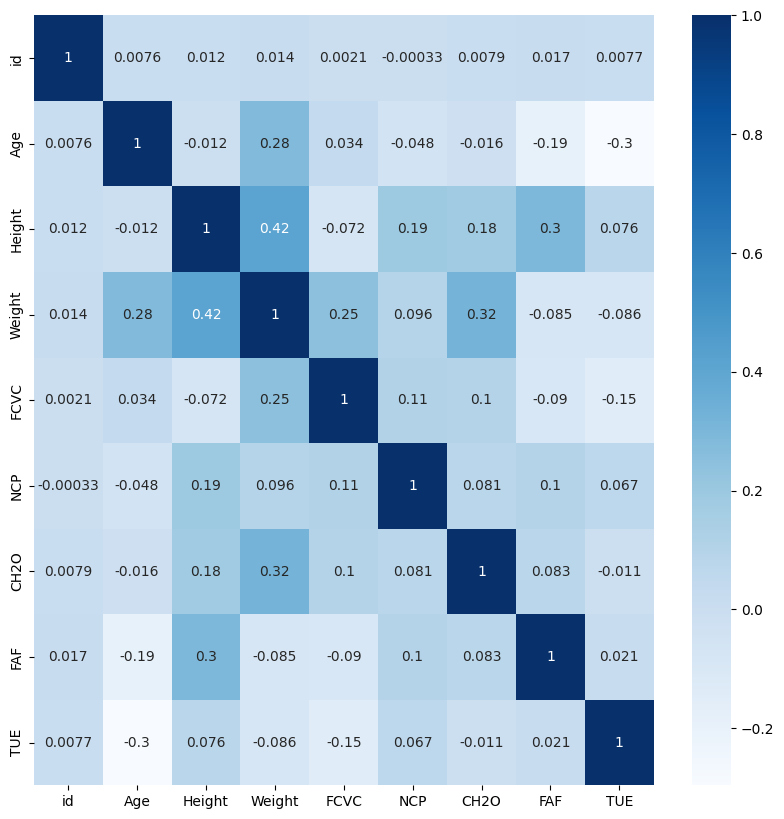

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues');

## <font color=#C0C0C0> Gereksiz Verileri Silme İşlemi Yapıyoruz - We Delete Unnecessary Data

In [13]:
df=df.drop('id',axis=1)
df.head(1)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.66995,yes,yes,2.0,2.983297,Sometimes,no,2.763573,no,0.0,0.976473,Sometimes,Public_Transportation,Overweight_Level_II


In [14]:
df['Age']=df['Age'].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  int32  
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             

## <font color=#1cfc03> Aykırı Değer - Outlier

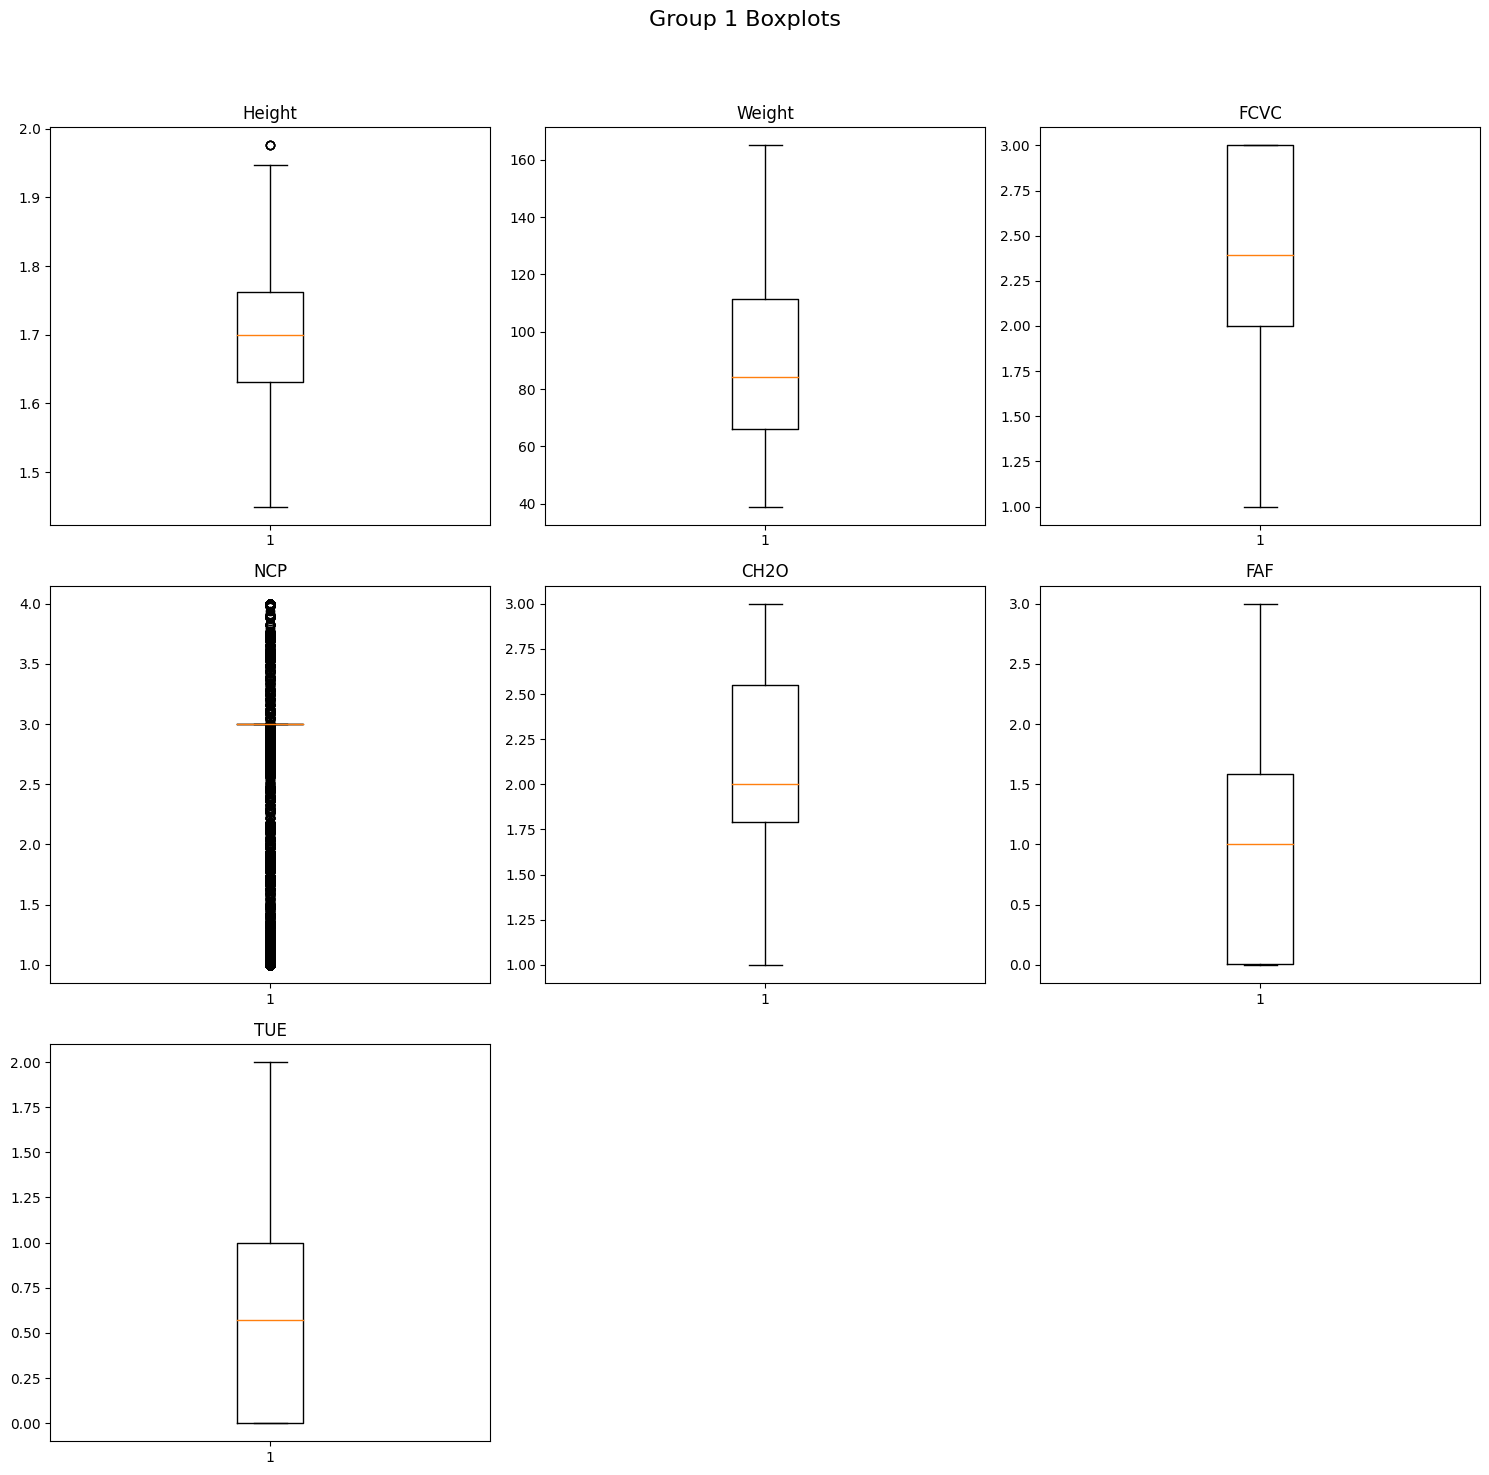

In [16]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns  
# TR = Veri setindeki tüm sayısal sütunları seçer  
# EN = Selects all numeric columns in the dataset

num_cols = len(numeric_cols)  
# TR = Sayısal sütunların toplam sayısını hesaplar  
# EN = Calculates the total number of numeric columns

num_plots_per_group = 9  
# TR = Her grup için 9 grafik olacağını belirtir  
# EN = Specifies that each group will contain 9 plots

num_groups = math.ceil(num_cols / num_plots_per_group)  
# TR = Toplam grafikleri 9'luk gruplar halinde kaç grup gerektiğini hesaplar  
# EN = Calculates how many groups of 9 plots are needed for the total columns

for group in range(num_groups):  
    # TR = Her grup için döngü başlatır  
    # EN = Starts a loop for each group

    cols_in_group = numeric_cols[group * num_plots_per_group:(group + 1) * num_plots_per_group]  
    # TR = Her grup için 9 sütun seçer  
    # EN = Selects 9 columns for each group

    num_plots = len(cols_in_group)  
    # TR = Bu gruptaki toplam grafik sayısını hesaplar  
    # EN = Calculates the total number of plots in the group

    rows = math.ceil(num_plots / 3)  
    # TR = Her grafiğin 3 sütun olacak şekilde kaç satırda yer alacağını belirler  
    # EN = Determines how many rows are needed for 3 columns of plots

    fig, axs = plt.subplots(rows, 3, figsize=(15, 5 * rows))  
    # TR = Grafik alt pencereleri (subplots) oluşturur  
    # EN = Creates the subplots for the group

    axs = axs.flatten() if num_plots > 1 else [axs]  
    # TR = Grafik pencerelerini düzleştirir (eğer tek değilse)  
    # EN = Flattens the plot axes (if there’s more than one)

    for i, col in enumerate(cols_in_group):  
        # TR = Her sütun için döngü başlatır  
        # EN = Loops through each column in the group

        axs[i].boxplot(df[col].dropna())  
        # TR = Veri setindeki ilgili sütunun aykırı değerlerini gösteren kutu grafiği oluşturur  
        # EN = Creates a boxplot for the column to show outliers

        axs[i].set_title(col)  
        # TR = Her grafiğe başlık ekler  
        # EN = Adds a title to each plot

    for i in range(num_plots, len(axs)):  
        # TR = Eğer tüm grafikler kullanılmadıysa, fazla olanları gizler  
        # EN = Hides any unused axes if there are fewer plots than subplots

        axs[i].set_visible(False)  

    plt.suptitle(f'Group {group + 1} Boxplots', fontsize=16)  
    # TR = Grup başlığı ekler  
    # EN = Adds a title for the group of boxplots

    plt.tight_layout(rect=[0, 0, 1, 0.95])  
    # TR = Grafiklerin düzenli görünmesini sağlar  
    # EN = Ensures the layout is clean and well-organized

In [17]:
# TR = Aykırı değer çok fazla olduğu için işlem yapmadık. 
# EN = We did not take any action because there were too many outliers.

## <font color=#e0c510> Verileri Görşelleştirme - Visualizing Data me

In [18]:
#for column in df.columns:
    # TR = Verideki her bir sütun için döngü başlatılıyor  
    # EN = Loops through each column in the dataframe

#    print(f"\nSütun: {column}")  
    # TR = Sütun ismi ekrana yazdırılıyor  
    # EN = Prints the column name

#    unique = df[column].dropna().unique()  
    # TR = NaN değerleri düşürerek benzersiz değerler elde ediliyor  
    # EN = Gets the unique values after dropping NaN values

#    if pd.api.types.is_numeric_dtype(df[column]):  
        # TR = Eğer sütundaki değerler sayısal ise, değerler sıralanıyor  
        # EN = If the column is of numeric type, the unique values are sorted
#        unique = sorted(unique)
        
#    nunique = len(unique)  # Benzersiz değerlerin sayısını hesapla
    # TR = Benzersiz değerlerin sayısını hesaplar  
    # EN = Calculates the number of unique values

#    print(f"Nunique Değerler: {nunique}")  
    # TR = Benzersiz değerlerin sayısını ekrana yazdırır  
    # EN = Prints the number of unique values

#    print(f"Unique Değerler: {unique}")  
    # TR = Benzersiz değerler ekrana yazdırılıyor  
    # EN = Prints the unique values


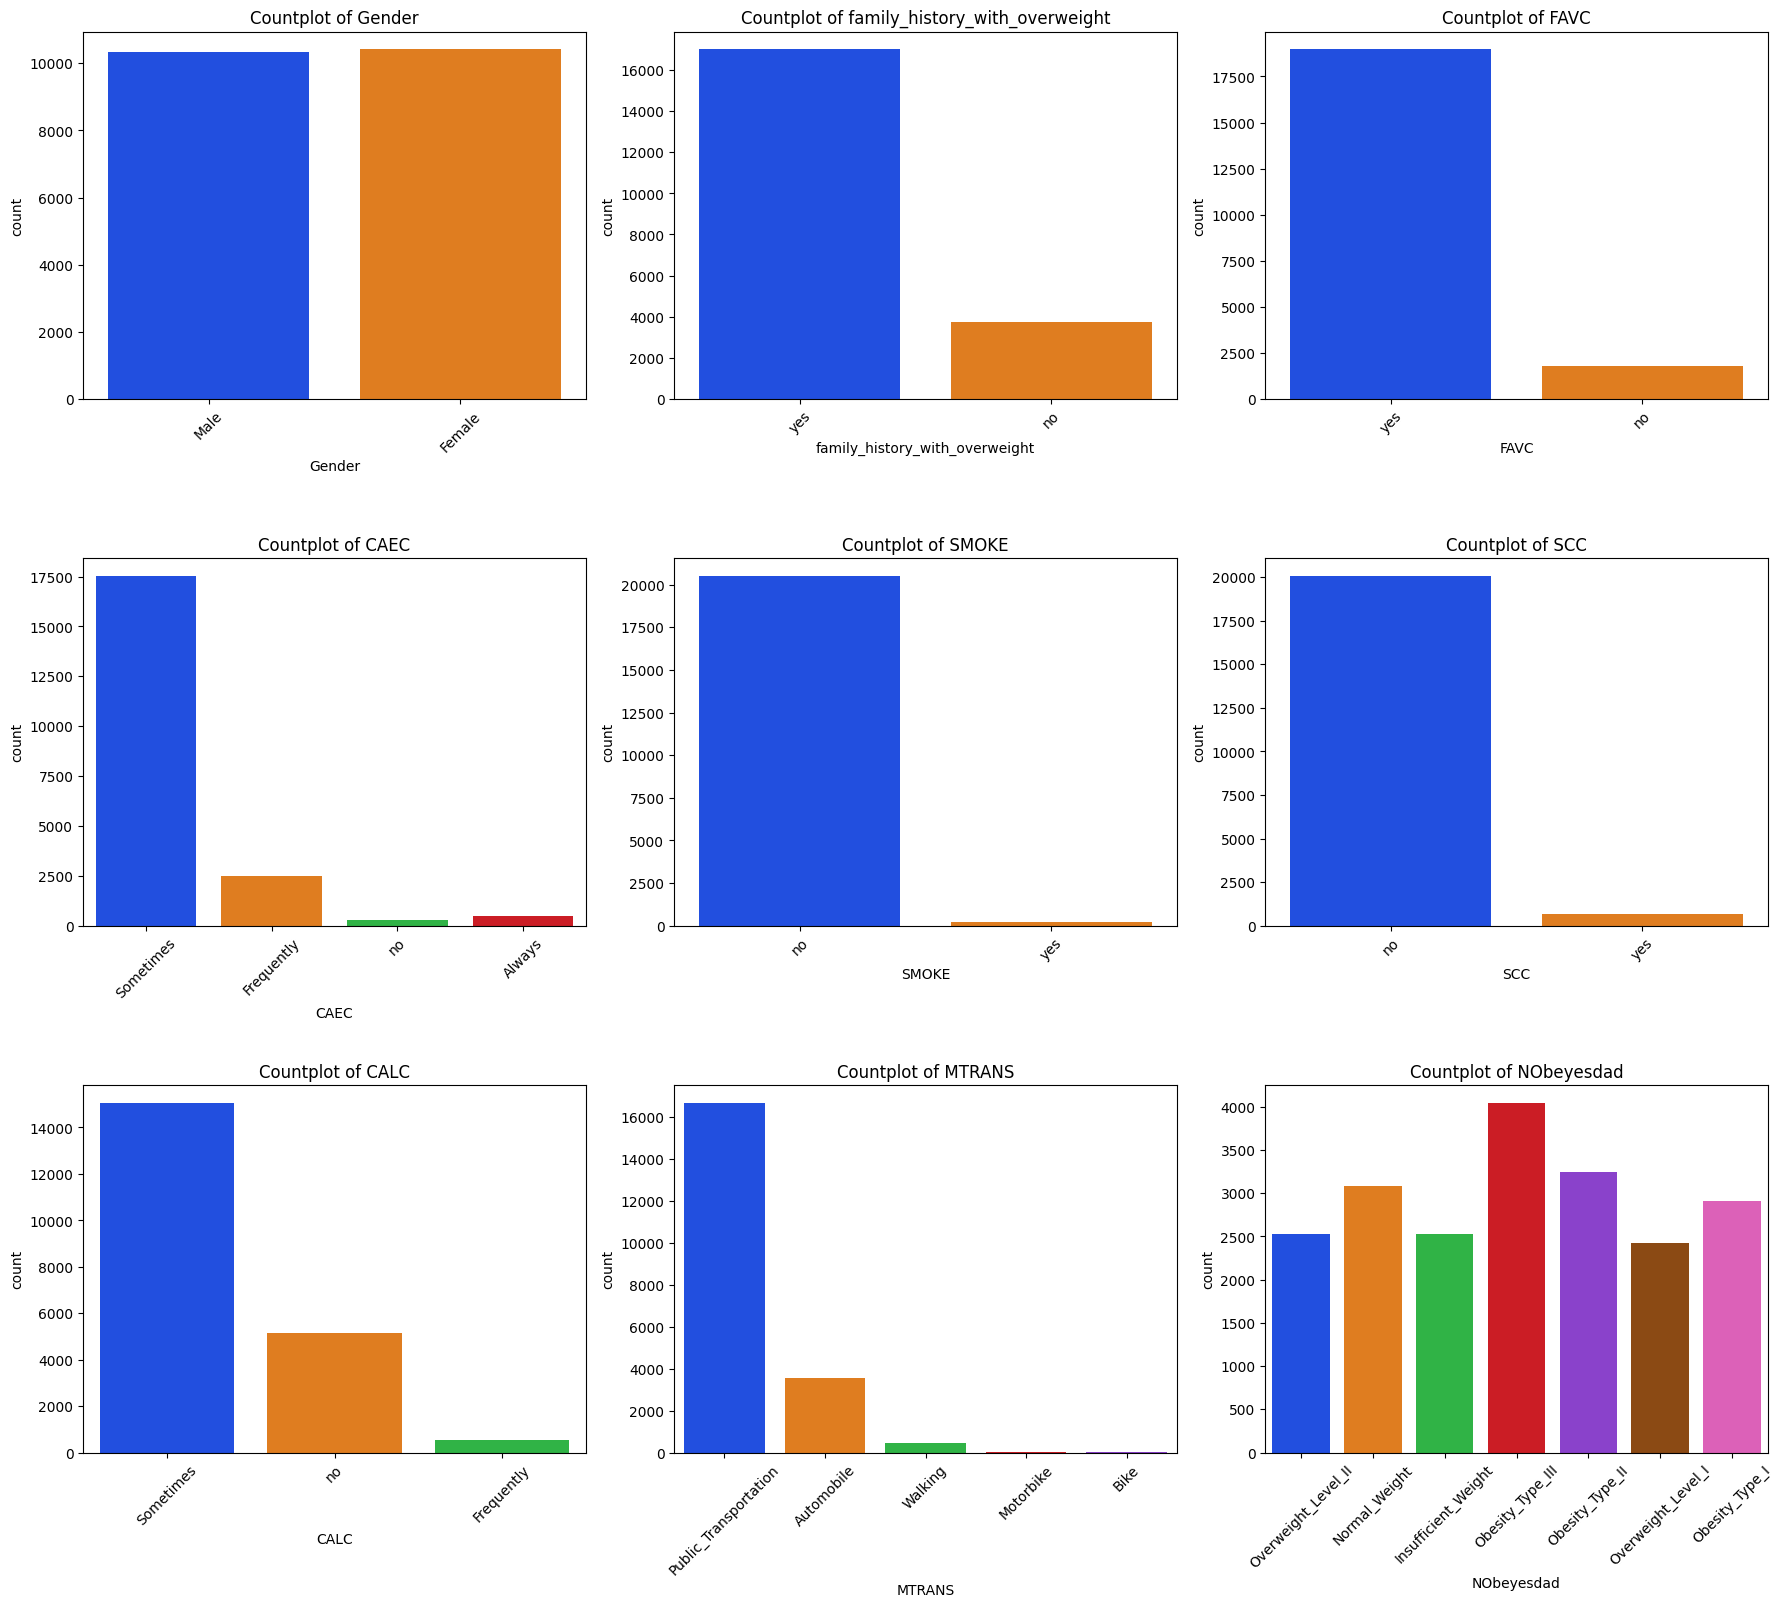

In [19]:
object_columns = df.select_dtypes(include=['object']).columns  
# TR = Object veri türündeki sütunları alır  
# EN = Selects columns with object data type

columns = [col for col in df.columns if col in object_columns] 
# TR = (in df.columns) df DataFrame içindeki (col for col)her sütuna bak.
# TR = (if col in object_columns) istenilen kolonlara bakar.

# EN = (in df.columns) Look at each column in df DataFrame (col for col).
# EN = (if col in object_columns) looks at the desired columns.

num_columns = len(columns)
# TR = sütun sayısını okuyup, num_columns değişkenine atadım.
# EN = I read the number of columns and assigned it to the num_columns variable.

fig, axes = plt.subplots(nrows=(num_columns // 3) + 1, ncols=3, figsize=(18, (num_columns // 3 + 1) * 5))
# TR = nrows=(num_columns // 3) + 1: Bu, oluşturulacak alt grafiklerin (subplot'ların) satır sayısını belirler.
# TR = num_columns // 3, toplam sütun sayısının 3'e bölünmesiyle elde edilen tam sayı değerdir. + 1 ise, sütun sayısı 3'e tam bölünmüyorsa ekstra bir satır ekler.
# TR = ncols=3: Bu, her satırda kaç tane alt grafik olacağını belirler. Bu örnekte, her satırda 3 alt grafik olacak şekilde ayarlanmıştır.  
# TR = figsize=(18, (num_columns // 3 + 1) * 5): Bu, oluşturulacak figürün (grafiklerin tümünün bulunduğu büyük alanın) boyutlarını ayarlar.
# TR = figsize parametresi, genişlik ve yükseklik değerlerini (18, (num_columns // 3 + 1) * 5) şeklinde alır. 
# TR = Genişlik 18 inç, yükseklik ise her satır için 5 inç olacak şekilde hesaplanır.

# EN = nrows=(num_columns // 3) + 1: This determines the number of rows of subplots to be created.
# EN = num_columns // 3 is the integer value obtained by dividing the total number of columns by 3. + 1 adds an extra row if the column count is not perfectly divisible by 3.
# EN = ncols=3: This determines how many subplots will be in each row. In this example, there will be 3 subplots per row.
# EN = figsize=(18, (num_columns // 3 + 1) * 5): This sets the size of the figure (the large area containing all the plots).
# EN = The figsize parameter takes the width and height values as (18, (num_columns // 3 + 1) * 5).
# EN = The width is 18 inches, and the height is calculated as 5 inches per row.


for i, column in enumerate(columns):  
    row = i // 3  
    # TR = Her sütunun hangi satırda gösterileceğini hesaplar (3 sütundan birinde)  
    # EN = Calculates which row each column should be displayed in (one of three columns)

    col = i % 3  
    # TR = Her sütunun hangi sütunda gösterileceğini hesaplar (0'dan 2'ye kadar)  
    # EN = Calculates which column each plot should be placed in (from 0 to 2)

    sns.countplot(data=df, x=column, ax=axes[row, col],palette='bright')
    # TR = Kategorik verilerin her bir sınıfındaki gözlem sayısını görselleştirmek için kullanılır ve her kategorinin frekansını çubuklarla gösterir.
    # EN = It is used to visualize the number of observations in each class of categorical data and shows the frequency of each category with bars.

    # TR = (data=df) Veriyi df adlı DataFrame alacak.
    # TR = (x=column) column değişkenindeki sütunları alıp yatay eksenine eşitleyecek
    # TR = (ax=axes[row, col]) Tablonun yukarıdan ve soldan kaçıncı sırada duracağını beliler

    # EN = (data=df) Will take the data from the DataFrame named df.
    # EN = (x=column) Will take the columns in the column variable and assign them to the x-axi
    # EN = (ax=axes[row, col]) Specifies the position in the grid, indicating which row and column it will be placed in.

    axes[row, col].set_title(f'Countplot of {column}')  
    # TR = Grafiğin başlığını, ilgili sütun adı ile ayarlar  
    # EN = Sets the title of the plot to the name of the column

    axes[row, col].tick_params(axis='x', rotation=45)
    # TR = X eksenindeki etiketlerin 45 derece döndürülmesini sağlar.
    # EN = Rotates the x-axis labels by 45 degrees.

for j in range(i+1, len(axes.flat)):  
    # TR = Kullanılmayan alt grafikler (subplots) siliniyor  
    # EN = Removing unused subplots

    fig.delaxes(axes.flat[j])  
    # TR = Belirtilen alt grafiği (subplot) siler  
    # EN = Deletes the specified subplot from the figure

plt.tight_layout()  
# TR = Grafiklerin düzenli görünmesi için yerleşim ayarlarını yapar  
# EN = Adjusts the layout for a tidy appearance

plt.show()  
# TR = Grafiği ekranda gösterir  
# EN = Displays the plot on the screen

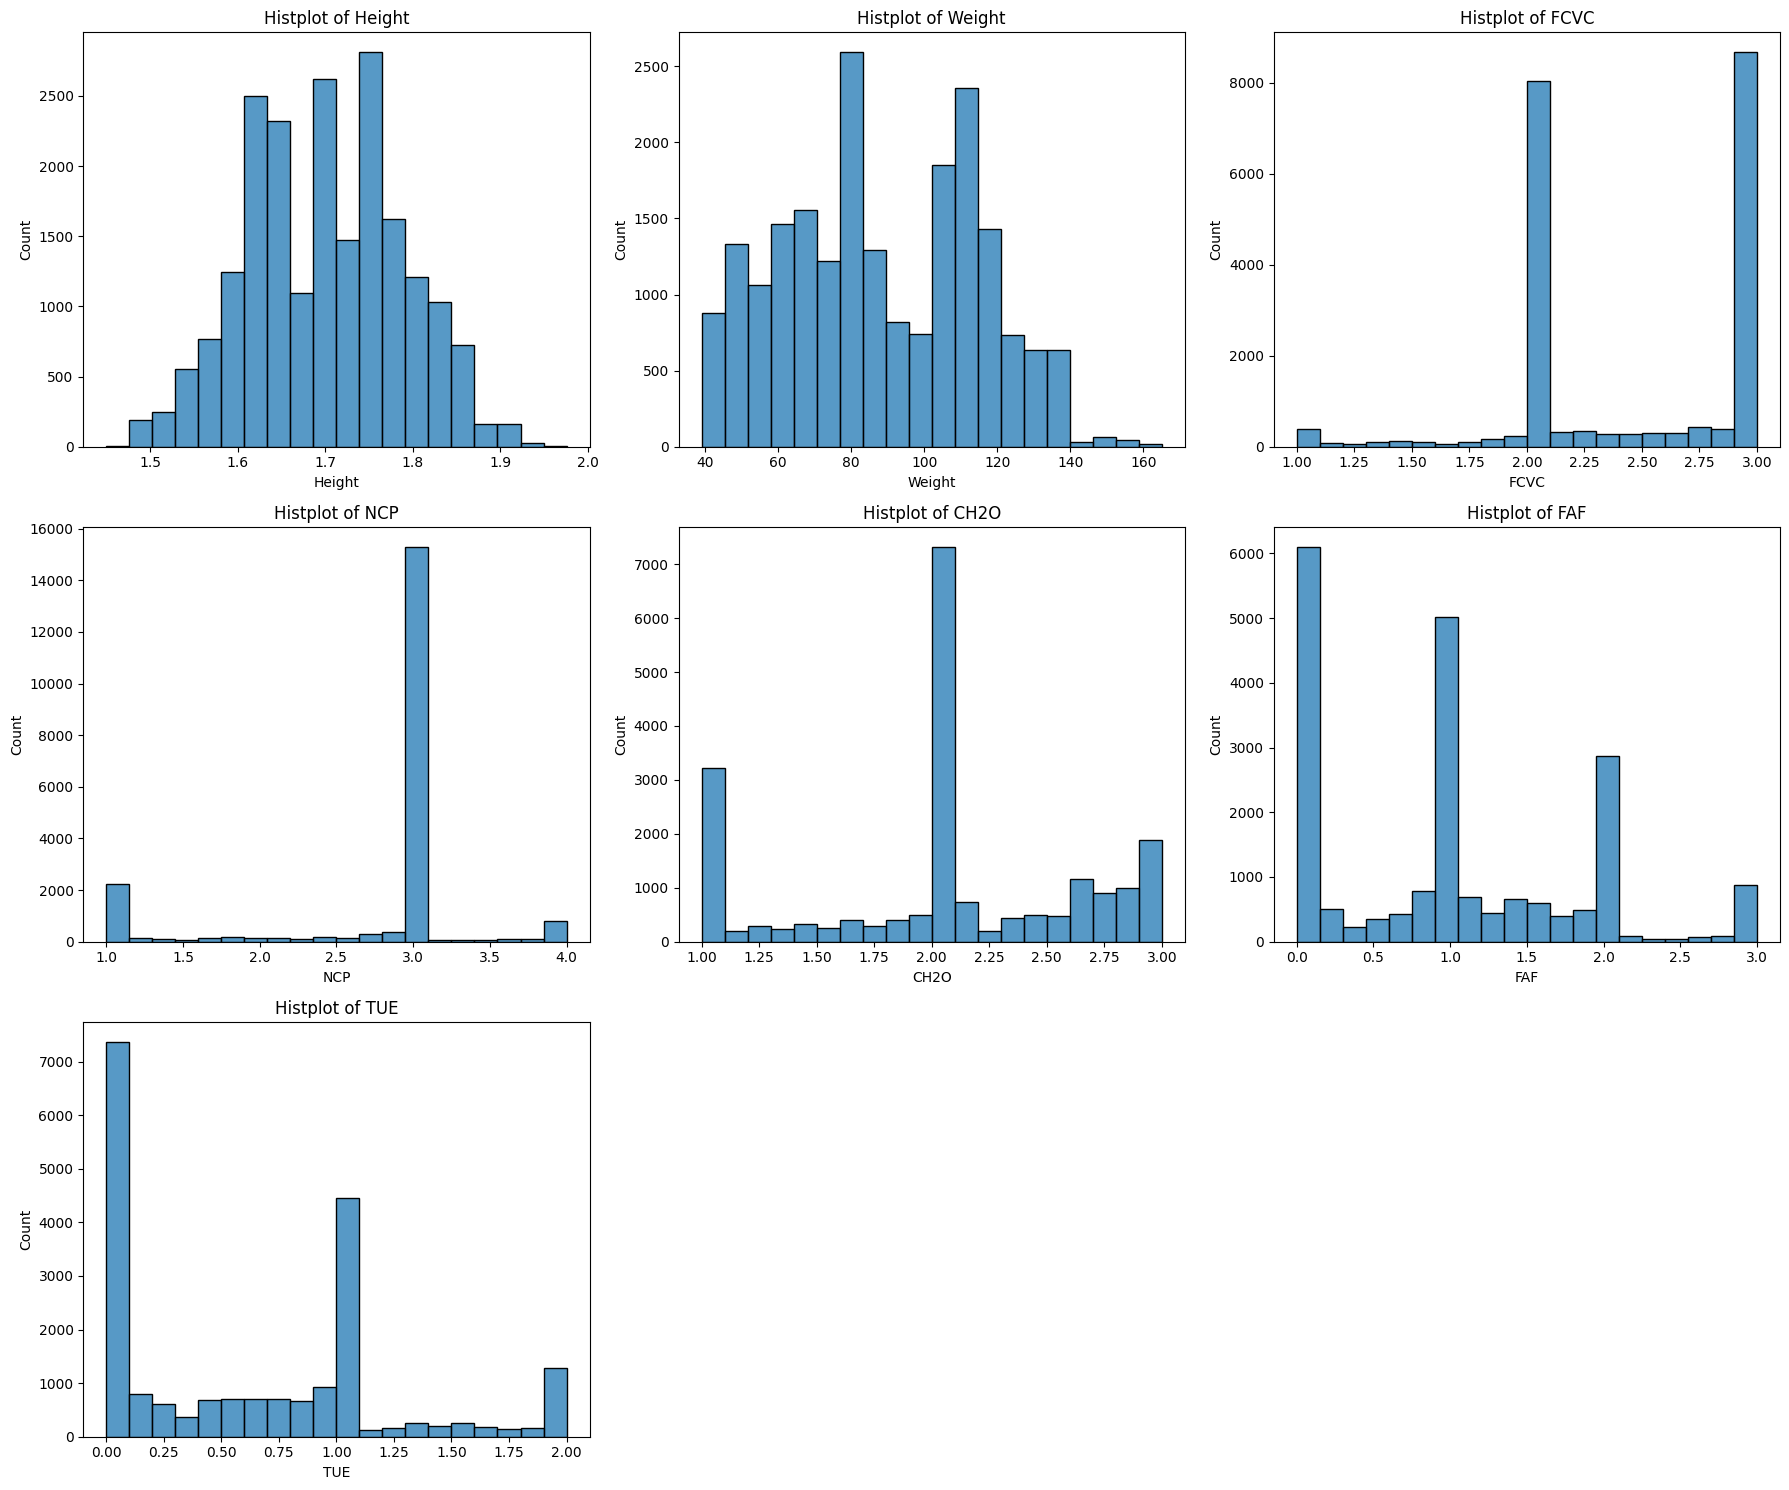

In [20]:
float_columns = df.select_dtypes(include=['float64']).columns
# TR = Float veri türündeki sütunları alır  
# EN = Selects columns with float data type

columns = [col for col in df.columns if col in float_columns] 
# TR = (in df.columns) df DataFrame içindeki (col for col)her sütuna bak.
# TR = (if col in object_columns) istenilen kolonlara bakar.

# EN = (in df.columns) Look at each column in df DataFrame (col for col).
# EN = (if col in object_columns) looks at the desired columns.

num_columns = len(columns)
# TR = sütun sayısını okuyup, num_columns değişkenine atadım.
# EN = I read the number of columns and assigned it to the num_columns variable.

fig, axes = plt.subplots(nrows=(num_columns // 3) + 1, ncols=3, figsize=(18, (num_columns // 3 + 1) * 5))
# TR = nrows=(num_columns // 3) + 1: Bu, oluşturulacak alt grafiklerin (subplot'ların) satır sayısını belirler.
# TR = num_columns // 3, toplam sütun sayısının 3'e bölünmesiyle elde edilen tam sayı değerdir. + 1 ise, sütun sayısı 3'e tam bölünmüyorsa ekstra bir satır ekler.
# TR = ncols=3: Bu, her satırda kaç tane alt grafik olacağını belirler. Bu örnekte, her satırda 3 alt grafik olacak şekilde ayarlanmıştır.  
# TR = figsize=(18, (num_columns // 3 + 1) * 5): Bu, oluşturulacak figürün (grafiklerin tümünün bulunduğu büyük alanın) boyutlarını ayarlar.
# TR = figsize parametresi, genişlik ve yükseklik değerlerini (18, (num_columns // 3 + 1) * 5) şeklinde alır. 
# TR = Genişlik 18 inç, yükseklik ise her satır için 5 inç olacak şekilde hesaplanır.

# EN = nrows=(num_columns // 3) + 1: This determines the number of rows of subplots to be created.
# EN = num_columns // 3 is the integer value obtained by dividing the total number of columns by 3. + 1 adds an extra row if the column count is not perfectly divisible by 3.
# EN = ncols=3: This determines how many subplots will be in each row. In this example, there will be 3 subplots per row.
# EN = figsize=(18, (num_columns // 3 + 1) * 5): This sets the size of the figure (the large area containing all the plots).
# EN = The figsize parameter takes the width and height values as (18, (num_columns // 3 + 1) * 5).
# EN = The width is 18 inches, and the height is calculated as 5 inches per row.


for i, column in enumerate(columns):  
    row = i // 3  
    # TR = Her sütunun hangi satırda gösterileceğini hesaplar (3 sütundan birinde)  
    # EN = Calculates which row each column should be displayed in (one of three columns)

    col = i % 3  
    # TR = Her sütunun hangi sütunda gösterileceğini hesaplar (0'dan 2'ye kadar)  
    # EN = Calculates which column each plot should be placed in (from 0 to 2)

    sns.histplot(data=df,x=column, bins=20, ax=axes[row, col])  
    # TR = Belirli bir değişkenin dağılımını görmek için kullanılır. Bu grafik, veri setindeki bir değişkenin frekanslarını veya yoğunluğunu analiz etmenizi sağlar.
    # EN = It is used to see the distribution of a particular variable. This plot allows you to analyze the frequencies or density of a variable in the dataset.

    # TR = (data=df) Veriyi df adlı DataFrame alacak.
    # TR = (x=column) column değişkenindeki sütunları alıp yatay eksenine eşitleyecek
    # TR = (bins=20) Veri ayarını 20 eşit genişlikte bölüme ayırmış olursunuz. 
    # TR = (ax=axes[row, col]) Tablonun yukarıdan ve soldan kaçıncı sırada duracağını beliler
    
    # EN = (data=df) Will take the data from the DataFrame named df.
    # EN = (x=column) Will take the columns in the column variable and assign them to the x-axi
    # EN = (bins=20) You will divide the data set into 20 equally wide sections.
    # EN = (ax=axes[row, col]) Specifies the position in the grid, indicating which row and column it will be placed in.

    axes[row, col].set_title(f'Histplot of {column}')  
    # TR = Grafiğin başlığını, ilgili sütun adı ile ayarlar  
    # EN = Sets the title of the plot to the name of the column


for j in range(i+1, len(axes.flat)):  
    # TR = Kullanılmayan alt grafikler (subplots) siliniyor  
    # EN = Removing unused subplots

    fig.delaxes(axes.flat[j])  
    # TR = Belirtilen alt grafiği (subplot) siler  
    # EN = Deletes the specified subplot from the figure

plt.tight_layout()  
# TR = Grafiklerin düzenli görünmesi için yerleşim ayarlarını yapar  
# EN = Adjusts the layout for a tidy appearance

plt.show()  
# TR = Grafiği ekranda gösterir  
# EN = Displays the plot on the screen

## <font color='#0F52BA'> Öznitelik Mühendisliği - Feature Engineering

### <font color=#007fff> Model - Modelling 

In [21]:
x=df.drop('NObeyesdad',axis=1)
y=df[['NObeyesdad']]

In [22]:
x=pd.get_dummies(x,drop_first=True) 
y=pd.get_dummies(y) 
# Tr =  kategorik değişkenlerin sayısal değişkenlere dönüştürülmesi için kullanılır. 
# En = It is used to convert categorical variables into numerical variables.

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
# TR = modelimizi eğittik. 
# EN = We trained our model.

In [24]:
scaler = MinMaxScaler()
# TR = Avantajları:
# TR = Negatif ve pozitif değerler içeren verilerde performansı artırabilir.
# TR = Aykırı değerlere karşı daha dayanıklıdır.
# TR = Dezavantajları:
# TR = Veriyi kesin bir aralığa sığdırmaz (örneğin, 0 ile 1 arasında).

# EN = Advantages:
# EN = Can improve performance for data containing both negative and positive values.
# EN = More robust to outliers.
# EN = Disadvantages:
# EN = Does not fit the data into a specific range (e.g., between 0 and 1).

x_train = scaler.fit_transform(x_train)
# TR = Verileri ölçekleyerek, modelin daha hızlı ve etkili öğrenmesini sağlamak için tüm özellikleri aynı aralığa getiriyoruz.
# EN = By scaling the data, we bring all the features into the same range to allow the model to learn faster and more effectively.

x_test = scaler.transform(x_test)
# TR = Test verilerini eğitimde kullanılan aynı ölçekle dönüştürerek modelin test verileri üzerinde doğru tahminler yapmasını sağlar.
# EN = It enables the model to make accurate predictions on the test data by transforming the test data to the same scale used in training.

In [28]:
model=Sequential()
model.add(Dense(256,activation='relu',input_dim=x_train.shape[1]))
# TR = Bu katman, tüm giriş nöronlarına bağlantı kurar ve her nöronun ağırlıklarını öğrenir. 256 nöron var.
# Aktivasyon fonksiyonunu ReLU (Rectified Linear Unit) olarak ayarlar. ReLU fonksiyonu, negatif değerleri sıfıra dönüştürür ve pozitif değerleri olduğu gibi bırakır.
# EN = This layer connects all input neurons and learns the weights of each neuron. There are 256 neurons.
# Sets the activation function to ReLU (Rectified Linear Unit). The ReLU function converts negative values ​​to zero and leaves positive values ​​as is.

model.add(BatchNormalization())
# TR = Bu katman, modelin eğitim sürecini daha stabil hale getirmek için kullanılır.
# EN = This layer is used to make the training process of the model more stable.

model.add(Dropout(0.2))
# TR = Derin öğrenme modelinde aşırı uyumu (overfitting) azaltmak için kullanılır. Genelde 0.2 ile 0.5 arasında olur.
# EN = It is used to reduce overfitting in the deep learning model. It is generally between 0.2 and 0.5.

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(12,activation='relu'))
model.add(BatchNormalization())

#model.add(Flatten())
# TR = Derin öğrenme modelindeki çok boyutlu (2D, 3D vb.) verileri tek boyutlu bir vektöre dönüştürür.
# EN = It converts multidimensional (2D, 3D, etc.) data in the deep learning model into a one-dimensional vector.

model.add(Dense(7, activation='softmax'))
# TR = Softmax fonksiyonu, çıktıların toplamını 1'e eşitleyerek çok sınıflı sınıflandırma problemleri için kullanılır.
# EN = The softmax function is used for multi-class classification problems by normalizing the outputs to sum up to 1.

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# TR = EarlyStopping ekleyin: Eğitim sırasında model performansı iyileşmediğinde erken durması için kullanıyoruz.
# EN = Add EarlyStopping: We use it to stop early when model performance does not improve during training.

# TR = val_loss 10 epoch boyunca iyileşmezse eğitimi durduruyor ve en iyi ağırlıkları geri yüklüyor.
# EN = If val_loss does not improve for 10 epochs, it stops training and restores the best weights.

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# TR = Çok sınıflı sınıflandırma (çıktı katmanı softmax aktivasyon kullanır ve hedefler one-hot kodlanmış olmalıdır).
# TR = Tahmin edilen sınıf olasılıkları ile gerçek sınıf etiketleri arasındaki farkı ölçer.
# TR = optimizer='adam': Adam (Adaptive Moment Estimation) optimizasyon algoritması, modelin ağırlıklarını güncellerken kullanılan bir yöntemdir.
# TR = metrics=['accuracy']: Modelin performansını değerlendirmek için kullanılan bir ölçümdür. Doğru sınıflandırılan örneklerin toplam örneklere oranını hesaplar.

# EN = Multi-class classification (output layer uses softmax activation, and targets must be one-hot encoded).
# EN = Measures the difference between the predicted class probabilities and the actual class labels.
# EN = optimizer='adam': Adam (Adaptive Moment Estimation) optimization algorithm is a method used when updating the weights of the model.
# EN = metrics=['accuracy']: A metric used to evaluate the performance of the model. It calculates the ratio of correctly classified examples to total examples.

history=model.fit(x_train, y_train, validation_split=0.2, batch_size=128, epochs=100, callbacks=[early_stopping])
# TR = Modeli 100 epoch boyunca eğitiyoruz, fakat EarlyStopping ile durdurulabilir. Batch boyutu 128 olarak belirlenmiş.
# EN = We train the model for 100 epochs, but it can be stopped with EarlyStopping. Batch size is set to 128.

Epoch 1/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4655 - loss: 1.5070 - val_accuracy: 0.5313 - val_loss: 1.5695
Epoch 2/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7018 - loss: 0.8308 - val_accuracy: 0.4028 - val_loss: 1.3133
Epoch 3/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7886 - loss: 0.5938 - val_accuracy: 0.6132 - val_loss: 0.9549
Epoch 4/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8238 - loss: 0.4930 - val_accuracy: 0.7104 - val_loss: 0.6485
Epoch 5/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8338 - loss: 0.4561 - val_accuracy: 0.7962 - val_loss: 0.4892
Epoch 6/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8402 - loss: 0.4353 - val_accuracy: 0.8666 - val_loss: 0.3767
Epoch 7/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8456 - loss: 0.4170 - val_accuracy: 0.8606 - val_loss: 0.3877
Epoch 8/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8514 - loss: 0.4096 - val_accu

In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 256)                 │           5,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 12)                  │             396 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 12)                  │              48 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 7)                   │              91 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 152,759 (596.72 KB)

 Trainable params: 50,591 (197.62 KB)

 Non-trainable params: 984 (3.84 KB)

 Optimizer params: 101,184 (395.25 KB)

In [30]:
test_loss, test_acc = model.evaluate(x_test, y_test)
# TR = test_loss değişkeni, test verileri üzerinde hesaplanan kayıp değerini içerir. test_acc değişkeni, test verileri üzerinde hesaplanan doğruluk değerini içerir.
# EN = The test_loss variable contains the loss value calculated on the test data. The test_acc variable contains the accuracy value calculated on the test data.

print(f"Test doğruluğu: {test_acc:.4f}")

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.8585 - loss: 0.3952
Test doğruluğu: 0.8622


In [31]:
pred=model.predict(x_test)
# TR = modeli x_test ile predict özelliği ile tahmin ettik. predict=tahmin demek. Dahmin edip pred eşitledik. 
# EN = We predicted the model with x_test and the predict feature. predict=means prediction. We guessed and equalized the pred.

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [32]:
pred

array([[1.42292571e-04, 7.63116914e-05, 1.83475233e-04, ...,
        9.99403954e-01, 4.43847130e-05, 1.22261074e-04],
       [1.02465658e-03, 2.22981088e-02, 7.10540498e-03, ...,
        8.89019066e-05, 6.54710114e-01, 3.13186139e-01],
       [5.97653328e-04, 2.39022440e-04, 8.44566286e-01, ...,
        1.18559250e-03, 3.78502719e-02, 1.14417702e-01],
       ...,
       [2.37358021e-04, 2.25551503e-05, 9.58297312e-01, ...,
        7.21363642e-04, 1.88777559e-02, 1.88436732e-02],
       [7.80921197e-04, 4.76616528e-03, 2.32599527e-02, ...,
        8.03285802e-05, 2.23425359e-01, 7.46192873e-01],
       [8.25731317e-04, 2.99250917e-03, 5.22206798e-02, ...,
        1.03003375e-04, 3.77958149e-01, 5.64788282e-01]], dtype=float32)

In [33]:
pred = np.argmax(pred, axis=1)
pred

array([4, 5, 2, ..., 2, 6, 6], dtype=int64)

In [34]:
y_test

,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
10317,False,False,False,False,True,False,False
4074,False,False,False,False,False,True,False
9060,False,False,True,False,False,False,False
11286,False,False,False,True,False,False,False
8254,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...
20286,False,True,False,False,False,False,False
8233,False,False,True,False,False,False,False
11518,False,False,True,False,False,False,False
7947,False,False,False,False,False,True,False


In [35]:
y_test = np.argmax(y_test, axis=1)
y_test

array([4, 5, 2, ..., 2, 5, 6], dtype=int64)

In [36]:
accuracy_score(y_test, pred)
# TR = accuracy_score fonksiyonu ile y_test, pred kullanarak sonucumuzu bulduk.
# EN = We found our result using the accuracy_score function and y_test, pred.

0.8622350674373795

In [37]:
confusion_matrix(y_test, pred)
# TR = confusion_matrix fonksiyonu ile y_test, pred kullanarak ne kadarını yanlış tahmin ettiğimizi buluyoruz
# EN = Using the confusion_matrix function and y_test, pred, we find out how much we guessed wrong.

# TR = 4 sayı değeri veriyor bize. Sol üst ve sağ alt doğru tahmin, sağ üst ve sol alt yanlış tahmin. 
# EN = It gives us 4 number values. Upper left and lower right are correct guesses, upper right and lower left are incorrect guesses.

array([[478,  44,   0,   0,   0,   1,   1],
       [ 51, 496,   0,   0,   0,  70,   9],
       [  2,   0, 444,  18,   1,  17,  61],
       [  0,   0,  19, 633,   0,   0,   5],
       [  0,   0,   0,   1, 802,   1,   0],
       [  2,  41,  10,   0,   0, 362,  69],
       [  0,  11,  44,   6,   0,  88, 365]], dtype=int64)

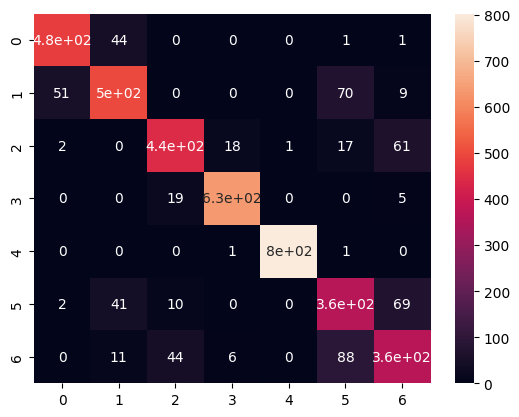

In [38]:
sns.heatmap(confusion_matrix(y_test, pred),annot=True);
# TR = Yukarıdakinin görsel versiyonu.
# EN = Visual version of the above.

In [39]:
print(classification_report(y_test, pred))
# TR = print içinde yazdık yoksa sayıların sıralanması bozuluyor.
# EN = We wrote it in print, otherwise the order of the numbers will be disrupted.

# TR = classification_report ile y_test, pred kullanarak precision, recall, f1-score ve support ulaştık.
# EN = We achieved precision, recall, f1-score and support using classification_report and y_test, pred.

# TR = Precision (Kesinlik): Doğru olarak pozitif tahmin edilen örneklerin, toplam pozitif tahmin edilen örnekler içindeki oranını gösterir. Yani, modelin pozitif sınıfı ne kadar doğru tahmin ettiğini ölçer.
# EN = Precision (Precision): It shows the ratio of correctly predicted positive samples among the total positive predicted samples. That is, it measures how accurately the model predicts the positive class.

# TR = Recall (Duyarlılık): Gerçek pozitif örneklerin, toplam pozitif örnekler içindeki oranını gösterir. Modelin pozitif sınıfı ne kadar iyi bulduğunu ölçer.
# EN = Recall (Sensitivity): Shows the ratio of true positive samples in total positive samples. It measures how well the model finds the positive class.

# TR = F1-score: Precision ve recall'un harmonik ortalamasıdır. Hem precision hem de recall'u dikkate alarak modelin genel performansını özetler.
# EN = F1-score: It is the harmonic mean of precision and recall. It summarizes the overall performance of the model, taking into account both precision and recall.

# TR = Support: Her sınıftan kaç örneğin bulunduğunu gösterir. Yani, gerçek etiketlerde her bir sınıfa ait kaç örnek olduğunu ifade eder.
# EN = Support: Shows how many examples of each class are available. That is, it expresses how many examples of each class there are in the real labels.

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       524
           1       0.84      0.79      0.81       626
           2       0.86      0.82      0.84       543
           3       0.96      0.96      0.96       657
           4       1.00      1.00      1.00       804
           5       0.67      0.75      0.71       484
           6       0.72      0.71      0.71       514

    accuracy                           0.86      4152
   macro avg       0.85      0.85      0.85      4152
weighted avg       0.86      0.86      0.86      4152



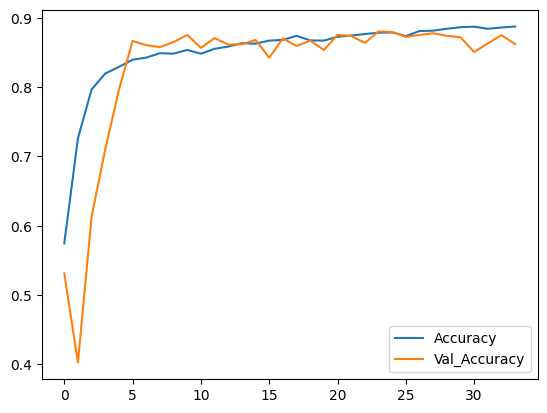

In [40]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend();

In [44]:
pickle.dump(model,open('Obezite.pkl','wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))